In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
# Load your imbalanced data into a Pandas DataFrame
df = pd.read_csv('liver.csv')


In [13]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\e

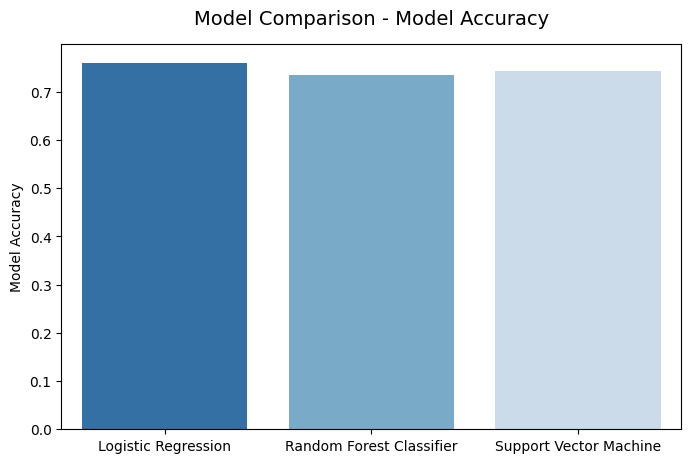

Confusion Matrix for Logistic Regression:
[[80  7]
 [21  9]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117


Confusion Matrix for Random Forest Classifier:
[[76 11]
 [20 10]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.79      0.87      0.83        87
           2       0.48      0.33      0.39        30

    accuracy                           0.74       117
   macro avg       0.63      0.60      0.61       117
weighted avg       0.71      0.74      0.72       117


Confusion Matrix for Support Vector Machine:
[[87  0]
 [30  0]]

Classification Report for Support Vector Machine:
 

c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Assuming 'Dataset' is your target variable
X = df.drop("Dataset", axis=1)
y = df["Dataset"]

# Mapping numeric values for Gender (assuming 'Gender' is a binary variable)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

# Filling missing values with the median
X.fillna(X.median(), inplace=True)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# Model Comparison
model_names = ["Logistic Regression", "Random Forest Classifier", "Support Vector Machine"]
model_scores = [lr_score, rfc_score, svm_score]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_scores, palette="Blues_r")
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03)
plt.show()

# Confusion Matrix and Classification Report for Logistic Regression
y_pred_lr = lr.predict(X_test)
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cf_matrix_lr)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix and Classification Report for Random Forest Classifier
y_pred_rfc = rfc.predict(X_test)
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cf_matrix_rfc)
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))

# Confusion Matrix and Classification Report for Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for Support Vector Machine:")
print(cf_matrix_svm)
print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))